## Exercício 2

Improving the Fuzzy classification with Genetic Algorithm, Differential Evolution and Particle Swarm Optimization.

In [1]:
import skfuzzy as fuzz
import numpy as np
from sklearn import datasets

# import Iris dataset
iris = datasets.load_iris() 
X = iris.data
y = iris.target

In [2]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {len(X_train)} samples")

Training set: 120 samples


In [3]:
# Normalize Train data
x_sepallength_train = X_train[:,0]
x_sepalwidth_train = X_train[:,1]
x_petallength_train = X_train[:,2]
x_petalwidth_train = X_train[:,3]

x_sepallength_train = (x_sepallength_train - x_sepallength_train.min()) / (x_sepallength_train.max() - x_sepallength_train.min())
x_sepalwidth_train = (x_sepalwidth_train - x_sepalwidth_train.min()) / (x_sepalwidth_train.max() - x_sepalwidth_train.min())
x_petallength_train = (x_petallength_train - x_petallength_train.min()) / (x_petallength_train.max() - x_petallength_train.min())
x_petalwidth_train = (x_petalwidth_train - x_petalwidth_train.min()) / (x_petalwidth_train.max() - x_petalwidth_train.min())

# Normalize Test data
x_sepallength_test = X_test[:,0]
x_sepalwidth_test = X_test[:,1]
x_petallength_test = X_test[:,2]
x_petalwidth_test = X_test[:,3]

x_sepallength_test = (x_sepallength_test - x_sepallength_test.min()) / (x_sepallength_test.max() - x_sepallength_test.min())
x_sepalwidth_test = (x_sepalwidth_test - x_sepalwidth_test.min()) / (x_sepalwidth_test.max() - x_sepalwidth_test.min())
x_petallength_test = (x_petallength_test - x_petallength_test.min()) / (x_petallength_test.max() - x_petallength_test.min())
x_petalwidth_test = (x_petalwidth_test - x_petalwidth_test.min()) / (x_petalwidth_test.max() - x_petalwidth_test.min())

In [4]:
sepallength = np.linspace(0, 1, 100)
sepalwidth = np.linspace(0, 1, 100)
petallength = np.linspace(0, 1, 100)
petalwidth = np.linspace(0, 1, 100)

def fit(individual, mode='train'):
    W1, W2, W3, W4 = individual

    # membership functions
    short_sepallength = fuzz.trimf(sepallength, [0, 0, W1])
    middle_sepallength = fuzz.trimf(sepallength, [0, W1, 1])
    long_sepallength = fuzz.trimf(sepallength, [W1, 1, 1])

    short_sepalwidth = fuzz.trimf(sepalwidth, [0, 0, W2])
    middle_sepalwidth = fuzz.trimf(sepalwidth, [0, W2, 1])
    long_sepalwidth = fuzz.trimf(sepalwidth, [W2, 1, 1])

    short_petallength = fuzz.trimf(petallength, [0, 0, W3])
    middle_petallength = fuzz.trimf(petallength, [0, W3, 1])
    long_petallength = fuzz.trimf(petallength, [W3, 1, 1])

    short_petalwidth = fuzz.trimf(petalwidth, [0, 0, W4])
    middle_petalwidth = fuzz.trimf(petalwidth, [0, W4, 1])
    long_petalwidth = fuzz.trimf(petalwidth, [W4, 1, 1])

    if mode == 'train':
        x_sepallength = x_sepallength_train
        x_sepalwidth = x_sepalwidth_train
        x_petallength = x_petallength_train
        x_petalwidth = x_petalwidth_train
    else:
        x_sepallength = x_sepallength_test
        x_sepalwidth = x_sepalwidth_test
        x_petallength = x_petallength_test
        x_petalwidth = x_petalwidth_test

    # Fuzzification
    sepallength_level_short = fuzz.interp_membership(sepallength, short_sepallength, x_sepallength)
    sepallength_level_middle = fuzz.interp_membership(sepallength, middle_sepallength, x_sepallength)
    sepallength_level_long = fuzz.interp_membership(sepallength, long_sepallength, x_sepallength)

    sepalwidth_level_short = fuzz.interp_membership(sepalwidth, short_sepalwidth, x_sepalwidth)
    sepalwidth_level_middle = fuzz.interp_membership(sepalwidth, middle_sepalwidth, x_sepalwidth)
    sepalwidth_level_long = fuzz.interp_membership(sepalwidth, long_sepalwidth, x_sepalwidth) 

    petallength_level_short = fuzz.interp_membership(petallength, short_petallength, x_petallength)   
    petallength_level_middle = fuzz.interp_membership(petallength, middle_petallength, x_petallength)
    petallength_level_long = fuzz.interp_membership(petallength, long_petallength, x_petallength)

    petalwidth_level_short = fuzz.interp_membership(petalwidth, short_petalwidth, x_petalwidth)
    petalwidth_level_middle = fuzz.interp_membership(petalwidth, middle_petalwidth, x_petalwidth)
    petalwidth_level_long = fuzz.interp_membership(petalwidth, long_petalwidth, x_petalwidth)

    # Fuzzy rules
    r1_a = np.fmax(sepallength_level_short, sepallength_level_long)
    r1_b = np.fmax(sepalwidth_level_middle, sepalwidth_level_long)
    r1_c = np.fmax(petallength_level_middle, petallength_level_long)
    r1_d = np.fmax(petalwidth_level_middle, petalwidth_level_long)
    r1 = np.fmin(r1_a, np.fmin(r1_b, np.fmin(r1_c, r1_d)))

    r2_a = np.fmax(petallength_level_short, petallength_level_middle)
    r2_b = petalwidth_level_short
    r2 = np.fmin(r2_a, r2_b)

    r3_a = np.fmax(sepalwidth_level_short, sepalwidth_level_middle)
    r3_b = petallength_level_long
    r3_c = petalwidth_level_long
    r3 = np.fmin(r3_a, np.fmin(r3_b, r3_c))

    r4_a = sepallength_level_middle
    r4_b = np.fmax(sepalwidth_level_short, sepalwidth_level_middle)
    r4_c = petallength_level_short
    r4_d = petalwidth_level_long
    r4 = np.fmin(r4_a, np.fmin(r4_b, np.fmin(r4_c, r4_d)))

    # Rule set outputs
    f_r1 = np.array([(0, r1, 0) for r1 in r1])
    f_r2 = np.array([(r2, 0, 0) for r2 in r2])
    f_r3 = np.array([(0, 0, r3) for r3 in r3])
    f_r4 = np.array([(0, r4, 0) for r4 in r4])

    # Decision Making Logic
    f = np.fmax(f_r1, np.fmax(f_r2, np.fmax(f_r3, f_r4)))

    # Predict
    y_hat = np.argmax(f, axis=1)
    if mode == 'train':
        _y = y_train
    else:
        _y = y_test
    
    accuracy = np.mean(y_hat == _y)
    return 1-accuracy

In [5]:
def fit_train(individual):
    return fit(individual, mode='train')

## Optimizing with Differential Evolution

In [6]:
from sko.DE import DE

de = DE(func=fit_train, n_dim=4, size_pop=50, max_iter=100, lb=[0, 0, 0, 0], ub=[1, 1, 1, 1])

best_x_de, best_y_de = de.run()
print(f'best_x_de: {best_x_de}\n DE Train Accuracy: {1-best_y_de}')

best_x_de: [0.59980776 0.978771   0.59630785 0.34408591]
 DE Train Accuracy: [0.94166667]


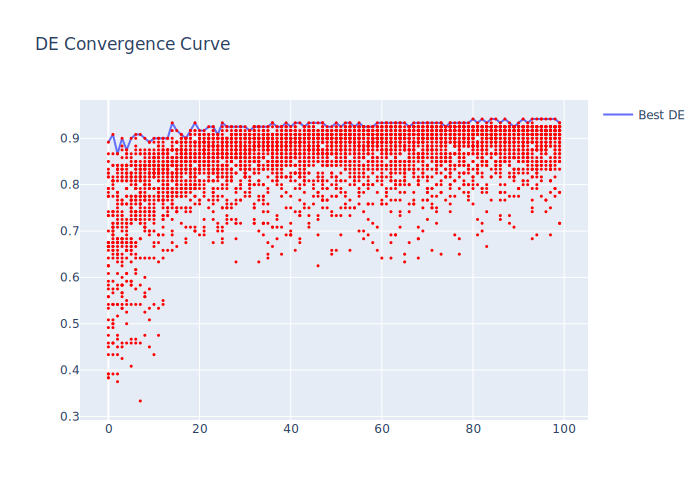

In [17]:
import plotly.graph_objects as go
history_de_best = [1 - y.min() for y in de.all_history_Y]

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(history_de_best))), y=history_de_best, name='Best DE', mode='lines'))
for i, Y in enumerate(de.all_history_Y):
    x = [i]*len(Y)
    fig.add_trace(go.Scatter(x=[i]*len(Y), y=1-Y, mode='markers', marker=dict(color='red', size=3), showlegend=False))

fig.update_layout(title='DE Convergence Curve')
fig.show('svg')

In [8]:
# Testing the result of DE
W1, W2, W3, W4 = best_x_de

accuracy_de = 1 - fit([W1, W2, W3, W4], mode='test')
print(f"DE Test Accuracy: {accuracy_de*100:.2f}%")


DE Test Accuracy: 90.00%


## Optimizing with Genetic Algorithm

In [9]:
from sko.GA import GA

ga = GA(func=fit_train, n_dim=4, size_pop=50, max_iter=100, lb=[0, 0, 0, 0], ub=[1, 1, 1, 1])
best_x_ga, best_y_ga = ga.run()
print(f'best_x: {best_x_ga}\n GA Training Accuracy: {1-best_y_ga}')

best_x: [0.94554394 0.88068759 0.45906386 0.4939039 ]
 GA Training Accuracy: [0.90833333]


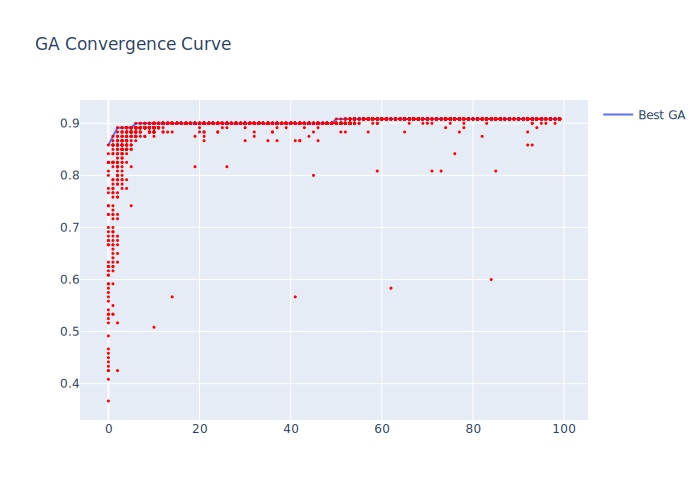

In [18]:
import plotly.graph_objects as go
history_ga_best = [1 - y.min() for y in ga.all_history_Y]

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(history_ga_best))), y=history_ga_best, name='Best GA', mode='lines'))
for i, Y in enumerate(ga.all_history_Y):
    x = [i]*len(Y)
    fig.add_trace(go.Scatter(x=[i]*len(Y), y=1-Y, mode='markers', marker=dict(color='red', size=3), showlegend=False))

fig.update_layout(title='GA Convergence Curve')
fig.show('svg')

In [11]:
# GA testing
W1, W2, W3, W4 = best_x_ga

accuracy_ga = 1 - fit([W1, W2, W3, W4], mode='test')
print(f"GA Test Accuracy: {accuracy_ga*100:.2f}%")

GA Test Accuracy: 90.00%


## Optimizing with Particle Swarm Optimization

In [12]:
from sko.PSO import PSO

pso = PSO(func=fit_train, n_dim=4, pop=50, max_iter=150, lb=[0, 0, 0, 0], ub=[1, 1, 1, 1], w=0.8, c1=0.5, c2=0.5)
pso.record_mode = True
pso.run()
print(f'best_x: {pso.gbest_x}\n PSO Training Accuracy: {1-pso.gbest_y}')


best_x: [1.         1.         0.42344974 0.49003513]
 PSO Training Accuracy: [0.925]


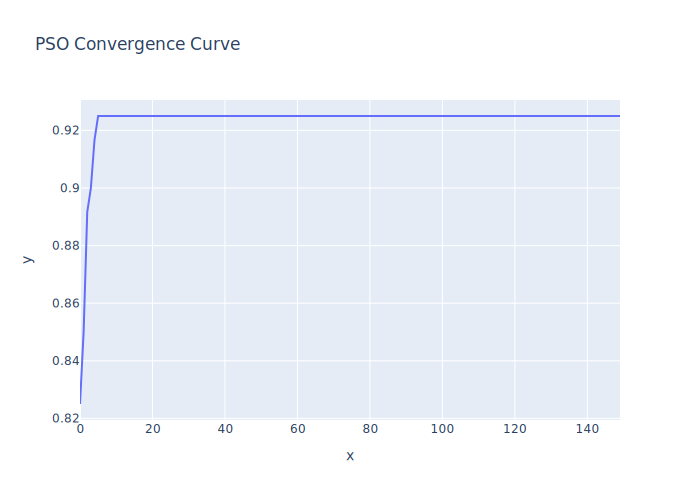

In [19]:
import plotly.express as px

pso_best_hist = [1 - y[0] for y in pso.gbest_y_hist]

fig = px.line(x=list(range(len(pso_best_hist))), y=pso_best_hist, title='PSO Convergence Curve')
fig.show('svg')

In [14]:
# PSO testing
W1, W2, W3, W4 = pso.gbest_x

accuracy_pso = 1 - fit([W1, W2, W3, W4], mode='test')
print(f"PSO Test Accuracy: {accuracy_pso*100:.2f}%")

PSO Test Accuracy: 90.00%


##  Results

In [16]:
import pandas as pd

results = {
    'Algorithm': ['DE', 'GA', 'PSO'],
    'Train Accuracy': [1-best_y_de[0], 1-best_y_ga[0], 1-pso.gbest_y[0]],
    'Test Accuracy': [accuracy_de, accuracy_ga, accuracy_pso]
}

df = pd.DataFrame(results)
df


,Algorithm,Train Accuracy,Test Accuracy
0,DE,0.941667,0.9
1,GA,0.908333,0.9
2,PSO,0.925000,0.9
